In [7]:
class Solution:
    def twoSum(self, nums, target):
        """
        :type nums: List[int]
        :type target: int
        :rtype: List[int]
        """
        result = []
        hash_dict = {}
        for i in range(len(nums)):
            if nums[i] in hash_dict:
                result.append([hash_dict[nums[i]],i])
#                 return [hash_dict[nums[i]],i]
            else:
                hash_dict[target - nums[i]] = i
        if result: return result
        return False
    
S = Solution()
S.twoSum([1,2,3,4],5)

[[1, 2], [0, 3]]

In [7]:
class Solution1:
    def shortestPathBinaryMatrix(self, grid) -> int:
        if grid[0][0] == 1 or grid[-1][-1] == 1:  # top-left is not empty or bottom-right is not empty
            return -1

        # eight directions: → ← ↓ ↑ ↗ ↙ ↖ ↘
        directions = [[1, 0], [-1, 0], [0, -1], [0, 1]] # # [1, 1], [1, -1], [-1, 1], [-1, -1]]
        
        queue = [(0, 0, 1, [0,0])]  # location, cnt
        n = len(grid)

        # BFS
        while len(queue):
            x0, y0, cnt, loc = queue.pop(0)  # pop (location, cnt)
            if x0 == n - 1 and y0 == n - 1:  # already arrive at bottom-right
                return cnt, loc

            # eight directions
            for i, j in directions:
                x, y = x0 + i, y0 + j
                # (x, y) is in the grid and grid[x][y] = 0, also means: grid[x][y] is not visited
                if 0 <= x < n and 0 <= y < n and not grid[x][y]:
                    queue.append((x, y, cnt + 1, loc + [x,y]  ) ) 
                    grid[x][y] = 1  # visited
        
        return -1
    
mat = [[0,0,0],[1,1,0],[1,1,0]]
SS = Solution1()
b = SS.shortestPathBinaryMatrix(mat)
print(b)

(5, [0, 0, 0, 1, 0, 2, 1, 2, 2, 2])


In [6]:
a = [1,2]
b = [2,3]
c = a+b
c

[1, 2, 2, 3]

In [25]:
print(str_to_int('+1231312312'))

TypeError: can only concatenate str (not "int") to str

In [13]:
a = [1,2,3,5,4]
print(sum(a[1:5]))
a.sort
print(a)

14
[1, 2, 3, 5, 4]


In [6]:
a = ['a','b','c']
print(' '.join(a))

abc


In [20]:
a =['anc']
#b = list(a)
#.sort()
#print(b)
print(sorted(a))

['anc']


57


[[inf, inf, inf], [inf, inf, inf], [inf, inf, inf], [inf, inf, inf], [inf, inf, inf]]


1

SyntaxError: invalid syntax (<ipython-input-1-4970f79e915a>, line 19)

In [2]:
def check(board, row, col):
    i = 0
    for i in range(row):
        if abs(board[i]-col) == 0 or abs(board[i]-col) == abs(i-row):
            return False
    return True
 
 
def eightqueen(board, row):
    border = len(board)
    if row >= border:
        for i,col in enumerate(board):
            print('□ ' * col + '■ ' + '□ ' * (len(board) - 1 - col))
        print("")
    col = 0
    while col < border:
        for col in range(border):
            if check(board, row, col):
                board[row] = col
                eightqueen(board, row+1)
        col += 1
 
board = [0 for i in range(4)]
eightqueen(board, 0)

□ ■ □ □ 
□ □ □ ■ 
■ □ □ □ 
□ □ ■ □ 

□ □ ■ □ 
■ □ □ □ 
□ □ □ ■ 
□ ■ □ □ 



In [3]:
#最短路径算法

import math
 
 
nodes = ('A', 'B', 'C', 'D', 'E')
# dis矩阵为方阵
dis = [[0,1,2,math.inf,4],
       [1,0,math.inf,8,2],
       [2,math.inf,0,math.inf,6],
       [math.inf,8,math.inf,0,3],
       [4,2,6,3,0]]
 
def shortDistance(dis):
    node_num = len(dis)
    for i in range(node_num):         # 十字交叉法的位置位置，先列后行
        for j in range(node_num):     # 列 表示dis[j][i]的值，即j->i
            for k in range(j+1, node_num): # 行 表示dis[i][k]的值，即i->k，i只是一个桥梁而已
                # 先列后行，形成一个传递关系，若比原来距离小，则更新
                if dis[j][k] > dis[j][i] + dis[i][k]:
                    dis[j][k] = dis[j][i] + dis[i][k]
                    dis[k][j] = dis[j][i] + dis[i][k]
print(dis)
shortDistance(dis)
print(dis)

[[0, 1, 2, inf, 4], [1, 0, inf, 8, 2], [2, inf, 0, inf, 6], [inf, 8, inf, 0, 3], [4, 2, 6, 3, 0]]
[[0, 1, 2, 6, 3], [1, 0, 3, 5, 2], [2, 3, 0, 8, 5], [6, 5, 8, 0, 3], [3, 2, 5, 3, 0]]


In [5]:
# coding:utf-8
# Dijkstra算法——通过边实现松弛
# 指定一个点到其他各顶点的路径——单源最短路径
# 初始化图参数
G = {1:{1:0, 2:1, 3:12},
  2:{2:0, 3:9, 4:3},
  3:{3:0, 5:5},
  4:{3:4, 4:0, 5:13, 6:15},
  5:{5:0, 6:4},
  6:{6:0}}
# 每次找到离源点最近的一个顶点，然后以该顶点为重心进行扩展
# 最终的到源点到其余所有点的最短路径
# 一种贪婪算法
def Dijkstra(G,v0,INF=999):
 """ 使用 Dijkstra 算法计算指定点 v0 到图 G 中任意点的最短路径的距离
  INF 为设定的无限远距离值
  此方法不能解决负权值边的图
 """
 book = set()
 minv = v0
 # 源顶点到其余各顶点的初始路程
 dis = dict((k,INF) for k in G.keys())
 dis[v0] = 0
 while len(book)<len(G):
  book.add(minv)         # 确定当期顶点的距离
  for w in G[minv]:        # 以当前点的中心向外扩散
   if dis[minv] + G[minv][w] < dis[w]:   # 如果从当前点扩展到某一点的距离小与已知最短距离
    dis[w] = dis[minv] + G[minv][w]   # 对已知距离进行更新
  new = INF          # 从剩下的未确定点中选择最小距离点作为新的扩散点
  for v in dis.keys():
   if v in book: continue
   if dis[v] < new:
    new = dis[v]
    minv = v
 return dis
dis = Dijkstra(G,v0=1)
print("脚本之家测试结果：")
print(dis.values())

脚本之家测试结果：
dict_values([0, 1, 8, 4, 13, 17])


In [3]:
# a = [1,2,3],b=[a,[2,3,4]] 修改b[0]中的元素，a会改变吗？
# 会
a = [1,2,3]
b = [a,[1,2,3]]
b[0][1] = 4
print(a)

[1, 4, 3]


Delete和Truncate的区别
1、 Truncate比Delete所用的事务日志空间更少：

DELETE 是一行一行操作，并且把记录都存进日志文件（说明一下，无论任何恢复模式，都会记录日志）。而TRUNCATE操作，是对一个页操作，在日志中，仅仅记录释放页面的这个动作，而不记录每一行。

2、 Truncate比Delete使用锁通常较少：

DELETE由于是一行一行删除，所以需要对处理的行进行加锁，而且是行锁。TRUNCATE操作由于是对页操作，所以只需要申请页锁或者表锁。

3、 TRUNCATE对表中的所有页都清空：

执行DELETE后，表还是会有空页，但是TRUNCATE则会全部清除。但是TRUNCATE会保留表结构、列、约束、索引等。而DELETE之后，会哦他能够过后台清除空页。

排序：
冒泡，归并，快速，插入，堆，希尔，

全局解释锁GIL，互斥锁
首先介绍全局解释解释器锁GIL，Python代码的执行由Python 虚拟机(也叫解释器主循环，CPython版本)来控制，Python 在设计之初就考虑到要在解释器的主循环中，同时只有一个线程在执行，即在任意时刻，只有一个线程在解释器中运行。对Python 虚拟机的访问由全局解释器锁（GIL）来控制，正是这个锁能保证同一时刻只有一个线程在运行。从宏观微观上来说，GIL是宏观的操作。比如在一个4核的环境下，只有一个核是运行着线程，而其他三个核是空的。GIL是线程锁，针对线程，而不是进程。

接下来是互斥锁：个线程要共享数据时，先将其锁定，此时资源的状态为“锁定”，其他线程不能更改；直到该线程释放资源，将资源的状态变成“非锁定”，其他的线程才能再次锁定该资源。互斥锁保证了每次只有一个线程进入写入操作，从而保证了多线程情况下数据的正确性。互斥锁体现的就是一个同步的机制，即该线程释放资源就是一个条件，条件完成，才能执行下一步操作。是微观的操作。

有GIL是由于历史原因。c++在c++11之前都是一点都没有线程概念的，全靠程序员自己实现线程管理和线程同步。而python诞生的时候还没有多核处理器，所以为了简化开发实现了GIL，后来很多库都假设python有GIL，想改也改不了了。

快速排序稳定性 

快速排序是不稳定的算法，它不满足稳定算法的定义。 算法稳定性 -- 假设在数列中存在a[i]=a[j]，若在排序之前，a[i]在a[j]前面；并且排序之后，a[i]仍然在a[j]前面。则这个排序算法是稳定的！

In [7]:
# 一位数组最大子序列
def findmaxsublist(list):
    if not list:
        return 0
    dp = [i for i in list]
    for i in range(1,len(dp)):
        dp[i] = max(dp[i-1]+dp[i],dp[i])
    return max(dp)

#(3362)# 二维矩阵中的最大子序列
def findmaxsubmtrx(mtrx):
    if not mtrx:
        return 0
    length = len(mtrx[0])
    width = len(mtrx)
    lmax = 0
    for i in range(width):
        dp = (length-1)*[0]
        #print(dp)
        for j in range(i,width):
            for k in range(length-1):
                #print(j,k)
                dp[k] = dp[k]+mtrx[j][k]
            lmax = max(lmax,findmaxsublist(dp))
    return lmax

#if __name__ == '__main__':
#    testlist = [2,-2,1,3,-4]
#    #print(findmaxsublist(testlist))

#    mtrx = [[0,-2,-7,0],[9,2,-6,2],[-4,1,-4,1],[-1,8,0,-2]]
#    print(findmaxsubmtrx(mtrx))
row = 3
mat = []
for num in range(row):
    mat.append(list(map(int, input().split())))
print(findmaxsubmtrx(mat))

-3 5 -1 5
2 4 -2 4
-1 3 -1 3
12


In [ ]:
def max_list(ls):
    if len(ls) <= 0:
        return False
    else:
        for i in range(len(ls)):

In [11]:
# 一个数组中的最大子数组
def maxSubArray(ls):
    if len(ls) < 2:
        return ls[0]
    temp = ls[0]
    max_num = ls[0]
    for i in range(1, len(ls)):
        if temp < 0:
            temp = ls[i]
        else:
            temp += ls[i]
        if temp > max_num:
            max_num = temp

    return max_num


# 将一个矩阵分成数组的形式
def max_sum(mat):
    if not mat:
        return
    low = len(mat)
    max_num = 0
    for i in range(low):
        res1 = list(mat[i])
        for j in range(i + 1, low):
            res1 = list(map(lambda x: x[0] + x[1], zip(res1, mat[j])))
            max_num = max(maxSubArray(res1), max_num)
    return max_num

mmm = [[-3,5,-1,5],[2,4,-2,4],[-1,3,-1,3]]
print(max_sum(mmm))

20


In [25]:
f = [[1,2,3],[3,4,5]]
#mat = [[0] * len(f[0])] * len(f)
def mat_updt(mat):
    mat_n = [[0 for i in range(len(mat[0]))] for j in range(len(mat))]
    for i in range(len(mat)):
        for j in range(len(mat[0])):
            mat_n[i][j] = max(mat[i][j]-1,mat_n[i][j])
    return mat_n
mat_n = mat_updt(f)
print(mat_n)

[[0, 1, 2], [2, 3, 4]]


In [8]:
tests = {}
cost = {}
tem1,tem2 = map(str,input().split(' '))
if len(tem1) > 1:
    ls = list(map(int, tem1.split(',')))
else:
    ls = [int(tem1)]
tem2 = [int(tem2)]
tests['0'] = ls
cost['0'] = tem2
print(tests)
print(cost)

3,5 2
{'0': [3, 5]}
{'0': [2]}


3
1
[3, 5]
[2]
[[3, 5], [2]]


In [10]:
import random
#random.random()
a = [(random.random(),random.random()) for i in range(3)]
print(a)
print(a[1])

[(0.7827937716377446, 0.30605888370409673), (0.5971456771443248, 0.41157163901210503), (0.8183106912289051, 0.4294785217304884)]
(0.5971456771443248, 0.41157163901210503)


In [21]:
import math
import random
def cal_pi(n):
        # write code here
        x = [(random.random(),random.random()) for i in range(n)]
        count = 0
        for i in x:
            if dist(0.5,0.5,i[0],i[1]) <= 0.5:
                count += 1
        return (count / n) * 4
def dist(x1,x2,y1,y2):
    return math.sqrt( (x1-x2) ** 2 + (y1-y2) ** 2 )
print(cal_pi(10000000))

2.999188


In [22]:
"v1.1.00-rc2">"v1.1-rc1"

True

In [3]:
a = [1,2,3,4,5]
#a[3-1:]
b = set(a)
print(len(b))

5


In [11]:
#n, m = map(int,input().split())

True

In [23]:
record1 = 'a-b 3:0'
record2 = 'b-a 1:1'
score = {}
#print( record1.split(' ')[1][0] ) 

HCIE_huawei

class xx
    def scores(record, score):
        s_l = record.split(' ')
        print(s_l)
        print(s_l[0][0])
    print(type(s_l[1][0]))
    if s_l[0][0] in record:
        record[ s_l[0][0] ] += int(s_l[1][0])
    else:
        record[ s_l[0][0] ] = int(s_l[1][0])
    #if s_l[1][0] in record:
    #    record
        
    return score

def sort_dict(score):
    keys = sorted(score)
    str_ = ''
    for i in keys:
        str_ += i
        str_ += ' '
        str_ += score[i]
        str_ += ','
    length = 4 * len(keys) - 1
    return str_[:length]

new_score = scores(record1, score)
#print(new_score)

['a-b', '3:0']
a
<class 'str'>


TypeError: string indices must be integers

In [13]:
b = {}
b['1'] = 2
b['2'] = 3
b['3'] = 0
#print(b)
#print(sorted(b))
str_ = '12345'
print(str_[:3])

123


In [8]:
def fn(n):
    if n < 0:
        return '---'
    elif n == 0:
        return 1
    elif n == 1:
        return 1
    else:
        return fn(n-1) + fn(n-2)

def dist(num):
    if num <= 0:
        return -num + 1
    id = 0
    while fn(id) < num:
        id += 1
    return min(fn(id)-num, num-fn(id-1))

print(dist(13))

0


In [13]:
"{:.2f}".format(0.13333)

'0.13'

[[0.7003673  0.74275081 0.70928001 0.56674552 0.97778533 0.70633485
  0.24791576 0.15788335 0.69769852 0.71995667]
 [0.25774443 0.34154678 0.96876117 0.6945071  0.46638326 0.7028127
  0.51178587 0.92874137 0.7397693  0.62243903]
 [0.65154547 0.39680761 0.54323939 0.79989953 0.72154473 0.29536398
  0.16094588 0.20612551 0.13432539 0.48060502]
 [0.34252181 0.36296929 0.97291764 0.11094361 0.38826409 0.78306588
  0.97289726 0.48320961 0.33642111 0.56741904]
 [0.04794151 0.38893703 0.90630365 0.16101821 0.74362113 0.63297416
  0.32418002 0.92237653 0.23722644 0.82394557]
 [0.75060714 0.11378445 0.84536125 0.92393213 0.22083679 0.93305388
  0.48899874 0.47471864 0.08916747 0.22994818]]
<class 'numpy.ndarray'>


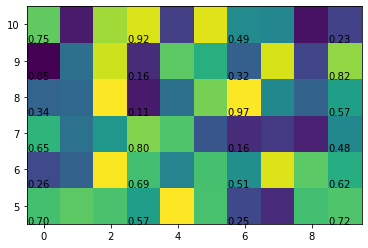

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np
np.random.seed(19680801)
Z = np.random.rand(6, 10)
x = np.arange(-0.5, 10, 1)  # len = 11
y = np.arange(4.5, 11, 1)  # len = 7
fig, ax = plt.subplots()
ax.pcolormesh(x, y, Z)
print(Z)
print(type(Z))
for i in range(len(x)-1):
    for j in range(len(y)-1):
        if i % 3 == 0:
            plt.text(x[i],y[j],str("{:.2f}".format(Z[j][i]) ))

In [14]:
def merge_sort(nums):
    if len(nums) <= 1:
        return nums
    mid = len(nums) // 2
    left = nums[:mid]
    right = nums[mid:]
    def merge(left, right):
        result = []
        while left and right:
            if left[0] <= right[0]:
                result.append(left[0])
                left.pop(0)
            else:
                result.append(right[0])
                right.pop(0)
        while left:
            result.append(left.pop(0))
        while right:
            result.append(right.pop(0))
        return result
    return merge(merge_sort(left) , merge_sort(right))

a = [3,2,4,1,5,7,7]
print(merge_sort(a))


[1, 2, 3, 4, 5, 7, 7]


In [59]:
# O(n) time, quick selection
# 这个k是从零开始数的，可以理解为这堆数如果排好序，那么sorted_nums[k]是谁。
def findKthLargest(nums, k):
    # convert the kth largest to smallest
    start = time.time()
    rst = findKthSmallest(nums, len(nums)+1-k)
    t = time.time() - start
    return rst, len(nums), t
    
def findKthSmallest(nums, k):
    if len(nums) < k:
        return -1
    if nums:
        pos = partition(nums, 0, len(nums)-1)
        if k > pos+1:
            return findKthSmallest(nums[pos+1:], k-pos-1)
        elif k < pos+1:
            return findKthSmallest(nums[:pos], k)
        else:
            return nums[pos]
 
# choose the right-most element as pivot   
# r的索引对应的数被用来做比较的，l每次都会前移，但是low只有nums[l]大于nums[r]
# 的时候才会前移，所以最后low之前的数字都是大于nums[r]的，l会走完整个数列到达r
# 的位置然后跳出整个循环，这时把nums[r]替换到nums[low]的位置就行了，前面的数
# 都比它小，后面的数都比它大。这个函数虽然没有return nums，但是其实对它进行了操作
def partition(nums, l, r):
    low = l
    while l < r:
        if nums[l] < nums[r]:
            nums[l], nums[low] = nums[low], nums[l]
            low += 1
        l += 1
    nums[low], nums[r] = nums[r], nums[low]
    return low

print(findKthSmallest([0,3,2,1,4,7,6,5], 6))

5


In [48]:
def partition(nums, l, r):
    low = l
    while l < r:
        if nums[l] < nums[r]:
            nums[l], nums[low] = nums[low], nums[l]
            low += 1
        l += 1
    nums[low], nums[r] = nums[r], nums[low]
    return nums,low

In [148]:
def findKthSmallest(nums, k):
    if len(nums) < k+1:
        return -1
    if nums:
        nums, pos = parti(nums)
        if k > pos:
            return findKthSmallest(nums[pos+1:], k-pos-1)
        elif k < pos:
            return findKthSmallest(nums[:pos], k)
        else:
            return nums[pos]

def parti(nums):
    l,r = 0, len(nums)-1
    while l < r:
        if nums[l] > nums[len(nums) - 1] and nums[r] < nums[len(nums) - 1]:
            nums[l], nums[r] = nums[r], nums[l]
        else:
            while nums[l] <= nums[len(nums) - 1] and l < len(nums) - 1:
                l += 1
            while nums[r] >= nums[len(nums) - 1] and r >= 0:
                r -= 1
    nums[len(nums) - 1], nums[r] = nums[r], nums[len(nums) - 1]
    return nums, j+1

print(parti([8,7,6,5,4,3,2,1,0,4.5]))   
print(findKthSmallest([8,7,6,5,4,3,2,1,0,4.5], 9))

([0, 1, 2, 3, 4, 4.5, 5, 6, 7, 8], 5)
8


In [1]:
def fib(n):
    if n <= 1:
        return n,1
    else:
        (a,b) = fib(n-1)
        return (a+b,a)
    
print(fib(50)) 

(20365011074, 12586269025)


In [60]:
def findKthSmallest(nums, k):
    if len(nums) < k+1:
        return -1
    if nums:
        nums, pos = partition2(nums)
        if k > pos:
            return findKthSmallest(nums[pos+1:], k-pos-1)
        elif k < pos:
            return findKthSmallest(nums[:pos], k)
        else:
            return nums[pos]

def partition2(nums):
    l,r = 0, len(nums)-1
    while l < r:
        if nums[l] > nums[len(nums) - 1] and nums[r] < nums[len(nums) - 1]:
            nums[l], nums[r] = nums[r], nums[l]
        else:
            while nums[l] <= nums[len(nums) - 1] and l < len(nums) - 1:
                l += 1
            while nums[r] >= nums[len(nums) - 1] and r >= 0:
                r -= 1
    nums[len(nums) - 1], nums[r] = nums[r+1], nums[len(nums) - 1]
    return nums, r
aa = [3,4,2,5,1,6,7,8,10,9,10]
print(partition(aa,0,len(aa)-1))
# print(findKthSmallest(aa,1))

9


In [10]:
class Solution:
  def findMedianSortedArrays(self, nums1, nums2):
    """
    :type nums1: List[int]
    :type nums2: List[int]
    :rtype: float
    """
    m, n = len(nums1), len(nums2)
    if m > n:
      nums1, nums2, m, n = nums2, nums1, n, m
#     if n == 0:
#       raise ValueError
    imin, imax, half_len = 0, m, (m + n + 1) // 2
    while imin <= imax:
      i = (imin + imax) // 2
      j = half_len - i
      if i < m and nums2[j-1] > nums1[i]:
        # i is too small, must increase it
        imin = i + 1
      elif i > 0 and nums1[i-1] > nums2[j]:
        # i is too big, must decrease it
        imax = i - 1
      else:
        # i is perfect
        if i == 0: max_of_left = nums2[j-1]
        elif j == 0: max_of_left = nums1[i-1]
        else: max_of_left = max(nums1[i-1], nums2[j-1])
        if (m + n) % 2 == 1:
          return max_of_left
        if i == m: min_of_right = nums2[j]
        elif j == n: min_of_right = nums1[i]
        else: min_of_right = min(nums1[i], nums2[j])
        return (max_of_left + min_of_right) / 2.0
a = Solution()
print(a.findMedianSortedArrays([1,2,3],[4,5,6,7,8,9,10]))

5.5


In [70]:
def median(nums, n):
    
    if n%2 == 0:
        return (nums[n//2] + nums[n//2-1])/2.0
    else:
        return nums[n//2]

def getMedian(nums1, nums2, n):
    m1, m2 = -1, -1
    if n <= 0:
        return -1
    elif n == 1:
        return (nums1[0] + nums2[0]) / 2
    elif n == 2:
        return (max(nums1[0], nums2[0]) + min(nums1[1], nums2[1])) / 2
    m1 = median(nums1, n)
    m2 = median(nums2, n)
    # /* 相等可直接返回 */
    if m1 == m2:
        return m1
    if m1 < m2:
        if n%2 == 0:
            return getMedian(nums1[n//2-1:], nums2[:n//2+1], n//2 + 1)
        else:
            return getMedian(nums1[n//2:], nums2[:n//2+1], n//2 + 1)
    else:
        if n%2 == 0:
            return getMedian(nums2[n//2-1:], nums1[:n//2+1], n//2 + 1)
        else:
            return getMedian(nums2[n//2:], nums1[:n//2+1], n//2 + 1)

if __name__ == "__main__":
    nums1 = [1, 12, 15, 26, 38]
    nums2 = [2, 13, 17, 30, 45]
    n1 = len(nums1)
    n2 = len(nums2)
    if n1 == n2:
        print("Median is %s", getMedian(nums1, nums2, n1))
    else:
        print("Doesn't work for arrays of unequal size")

Median is %s 16.0


In [11]:
class Solution:
    def findMedianSortedArrays(self, nums1, nums2) -> float:
        if len(nums1) > len(nums2):
            return self.findMedianSortedArrays(nums2, nums1)

        infinty = 2**40
        m, n = len(nums1), len(nums2)
        left, right = 0, m
        # median1：前一部分的最大值
        # median2：后一部分的最小值
        median1, median2 = 0, 0

        while left <= right:
            # 前一部分包含 nums1[0 .. i-1] 和 nums2[0 .. j-1]
            # // 后一部分包含 nums1[i .. m-1] 和 nums2[j .. n-1]
            i = (left + right) // 2
            j = (m + n + 1) // 2 - i

            # nums_im1, nums_i, nums_jm1, nums_j 分别表示 nums1[i-1], nums1[i], nums2[j-1], nums2[j]
            nums_im1 = (-infinty if i == 0 else nums1[i - 1])
            nums_i = (infinty if i == m else nums1[i])
            nums_jm1 = (-infinty if j == 0 else nums2[j - 1])
            nums_j = (infinty if j == n else nums2[j])

            if nums_im1 <= nums_j:
                median1, median2 = max(nums_im1, nums_jm1), min(nums_i, nums_j)
                left = i + 1
            else:
                right = i - 1

        return (median1 + median2) / 2 if (m + n) % 2 == 0 else median1
    
nums1 = [1, 12, 15, 26, 38]
nums2 = [2, 13, 17, 30, 45]
s = Solution()
s.findMedianSortedArrays(nums1,nums2)

16.0

In [70]:
def middle_value(nums):
    if len(nums) < 1:
        return '-1'
    if len(nums) == 1:
        return nums[0]
    else:
        if len(nums) % 2 == 1:
            return nums[len(nums)//2]
        else:
            return 0.5*(nums[len(nums)//2] + nums[len(nums)//2 - 1])

def medium_find(nums1,nums2):
    if len(nums1) > len(nums2):
        nums1, nums2 = nums2, nums1     
    if len(nums1) == 1 and len(nums2) == 1:
        return 0.5 * (nums1.pop() + nums2.pop() )
    if middle_value(nums1) == middle_value(nums2):
        return middle_value(nums1)
    if len(nums1) == 1:
        if len(nums2) % 2 == 1:
            if middle_value(nums2) > nums1[0]:
                if nums2[len(nums2) // 2 - 1] >= nums1[0]: return 0.5 * (middle_value(nums2) + nums2[len(nums2) // 2 - 1])
                else: return 0.5 * (nums1[0] + nums2[len(nums2) // 2])
            else:
                if nums2[len(nums2) // 2 + 1] <= nums1[0]: return 0.5 * (middle_value(nums2) + nums2[len(nums2) // 2 + 1])
                else: return 0.5 * (nums1[0] + nums2[len(nums2) // 2])
        else:
            if middle_value(nums2) > nums1[0]:
                if nums2[len(nums2) // 2 - 1] >= nums1[0]: return nums2[len(nums2) // 2 - 1]
                else: return nums1[0]
            else:
                if nums2[len(nums2) // 2 + 1] >= nums1[0]: return nums2[len(nums2) // 2 + 1]
                else: return nums1[0]
                
    else:   
        m1 = middle_value(nums1)
        m2 = middle_value(nums2)
        m1_m = len(nums1) // 2
#         m2_m = len(nums2) // 2 if len(nums2) % 2 == 0 else len(nums2) // 2 + 1
        if m1 > m2:
            return medium_find(nums1[:m1_m], nums2[m1_m:])
        else:
            return medium_find(nums1[m1_m:], nums2[: len(nums2) - m1_m])
print(medium_find([1,2,3,4,5,6,7],[8,9,10,11,12,13]))

6.5


In [5]:
class Solution:
    def findMedianSortedArrays(self, nums1, nums2) -> float:
        n1 = len(nums1)
        n2 = len(nums2)
        if n1 > n2:
            return self.findMedianSortedArrays(nums2,nums1)
        k = (n1 + n2 + 1)//2
        left = 0
        right = n1
        while left < right :
            m1 = left +(right - left)//2
            m2 = k - m1
            if nums1[m1] < nums2[m2-1]:
                left = m1 + 1
            else:
                right = m1
        m1 = left
        m2 = k - m1 
        c1 = max(nums1[m1-1] if m1 > 0 else float("-inf"), nums2[m2-1] if m2 > 0 else float("-inf") )
        if (n1 + n2) % 2 == 1:
            return c1
        c2 = min(nums1[m1] if m1 < n1 else float("inf"), nums2[m2] if m2 <n2 else float("inf"))
        return (c1 + c2) / 2
s = Solution()
s.findMedianSortedArrays([1,2,3,4,5],[6,7,8,9])

5

In [12]:
class Interval:
    def __init__(self, s=0, e=0):
        self.start = s
        self.end = e
    
    def __str__(self):
        return "[" + self.start + "," + self.end + "]"
    
    def __repr__(self):
        return "[%s, %s]" % (self.start, self.end)
def merge_interval(intervals):
    intervals.sort(key=lambda x: x.start)

    merged = []
    for interval in intervals:
        # if the list of merged intervals is empty or if the current
        # interval does not overlap with the previous, simply append it.
        if not merged or merged[-1].end < interval.start:
            merged.append(interval)
        else:
        # otherwise, there is overlap, so we merge the current and previous
        # intervals.
            merged[-1].end = max(merged[-1].end, interval.end)
    return merged
i1 = Interval(1,9)
i2 = Interval(2,5)
i3 = Interval(19,20)
i4 = Interval(10,11)
i5 = Interval(12,20)
i6 = Interval(0,3)
i7 = Interval(0,1)
i8 = Interval(0,2)
intervals = [i1,i2,i3,i4,i5,i6,i7,i8]
print(merge_interval(intervals))

intervals.sort(key=lambda x: x.start)
print(intervals)

[[0, 9], [10, 11], [12, 20]]
[[0, 9], [0, 1], [0, 2], [1, 9], [2, 5], [10, 11], [12, 20], [19, 20]]


In [16]:
a = [[2,1],[1,3],[3,2],[4,0]]
a.sort(key=lambda x: x[1])
a

[[4, 0], [2, 1], [3, 2], [1, 3]]

In [3]:
class Solution:
    def superEggDrop(self, K, N):
        # K egg, N floor;
        dp = [[0 for _ in range(N + 1)] for _ in range(K + 1)]
        for i in range(1, K + 1):
            for step in range(1, N + 1):
                dp[i][step] = dp[i - 1][step - 1] + (dp[i][step - 1] + 1)
                if dp[K][step] >= N:
                    return step
        return 0
SS = Solution()
print(SS.superEggDrop(2,100))

14


In [81]:
def superEggDrop(K: int, N: int):

    memo = dict()
    def dp(K, N) -> int:
        # base case
        if K == 1: return N
        if N == 0: return 0
        # 避免重复计算
        if (K, N) in memo:
            return memo[(K, N)]

        res = float('INF')
        # 穷举所有可能的选择
        for i in range(1, N + 1):
            res = min(res, 
                      max(
                            dp(K, N - i), 
                            dp(K - 1, i - 1)
                         ) + 1
                  )
        # 记入备忘录
        memo[(K, N)] = res
        return res

    return dp(K, N)
print(superEggDrop(3, 100))

9


In [6]:
def merge_sort(nums):
    def merge(l,r):
        result  = []
        while l and r:
            if l[0] < r[0]:
                result.append(l.pop(0))
            else:
                result.append(r.pop(0))
        while l:
            result.append(l.pop(0))
        while r:
            result.append(r.pop(0))
        return result
    mid = len(nums) // 2
    if len(nums) <= 1:
        return nums
    left = nums[:mid]
    right = nums[mid:]
    return merge(merge_sort(left),merge_sort(right))

a = [11,11,2,1,4,3,5,6,8,7,9,10]
print(merge_sort(a))


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 11]


In [17]:
def sort_stack(nums):
    result = []
    while nums:
        temp = nums.pop()
        while result and result[-1] < temp:
            nums.append(result.pop())
        result.append(temp)
    return result

print(sort_stack([5,4,3,2,1,1,2,3,4,5,6]))

[6, 5, 5, 4, 4, 3, 3, 2, 2, 1, 1]


[[2, 3, 3, 4],
 [2, 3, 4, 3],
 [2, 4, 3, 3],
 [3, 2, 3, 4],
 [3, 2, 4, 3],
 [3, 3, 2, 4],
 [3, 3, 4, 2],
 [3, 4, 2, 3],
 [3, 4, 3, 2],
 [4, 2, 3, 3],
 [4, 3, 2, 3],
 [4, 3, 3, 2]]